### Background

Rather than also doing the exact same plots as 2022 and 2023 for 2024, it might be better to look at the three years of data together. I only have data for these years so I can not compare any other years.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
from glob import glob

# change the default runtime configurations
plt.rc('axes',linewidth=2,titlesize=20,labelsize=16,labelpad=5)
plt.rc('xtick',labelsize=12,top=False)
plt.rc('ytick',labelsize=12,right=False)
plt.rc('legend',fontsize='medium',framealpha=0.6,markerscale=2)
plt.rc('font',family='Arial')
plt.rc('mathtext',fontset='stix',default='it')
plt.rcParams['font.family'] = 'Sans Serif'
plt.rcParams['mathtext.fontset']='stix'

# Set a nice style
sns.set_style("darkgrid")

### Load the dataset, clean it up

In [2]:
data_files = glob('daily-average*')
data_files

['daily-average-data-2022-all-stations-1714923065.xlsx',
 'daily-average-data-2023-all-stations-1717580574.xlsx',
 'daily-average-data-2024-all-stations-1751359609.xlsx']

In [3]:
station_loc = 'Khumaltar'
data = [pd.read_excel(f,sheet_name=station_loc) for f in data_files]

In [4]:
df_22_ = data[0]
df_23_ = data[1]
df_24_ = data[2]

In [5]:
# Count nulls in each column
print("Missing values for 2022:")
print(df_22_.isnull().sum())
print("Missing values for 2023:")
print(df_23_.isnull().sum())
print("Missing values for 2024:")
print(df_24_.isnull().sum())

Missing values for 2022:
date      0
PM2.5    49
PM10     38
dtype: int64
Missing values for 2023:
date      0
PM2.5    10
PM10     10
dtype: int64
Missing values for 2024:
date      0
PM2.5    15
PM10     15
dtype: int64


The missing values were noticed previously as well. We drop them, just like before.

In [6]:
df_22 = df_22_.dropna()
df_23 = df_23_.dropna()
df_24 = df_24_.dropna()

In [7]:
df22 = df_22.copy()
df23 = df_23.copy()
df24 = df_24.copy()

In [8]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 7 to 291
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    243 non-null    object 
 1   PM2.5   243 non-null    float64
 2   PM10    243 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.6+ KB


In [9]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 2 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    355 non-null    object 
 1   PM2.5   355 non-null    float64
 2   PM10    355 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.1+ KB


In [10]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    351 non-null    object 
 1   PM2.5   351 non-null    float64
 2   PM10    351 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.0+ KB


In [11]:
dataframes = [df22,df23,df24]

In [12]:
for i,df in enumerate(dataframes):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.month_name()
    df['year'] = df['date'].dt.year

Added month number, month names and years to the dataframe. This is needed below for plotting and calculation purposes.

In [13]:
dataframes[0]

,date,PM2.5,PM10,month,month_name,year
7,2022-03-22,70.764399,183.014240,3,March,2022
8,2022-03-23,79.836837,207.656542,3,March,2022
9,2022-03-24,71.542840,170.480046,3,March,2022
10,2022-03-25,56.742322,164.989258,3,March,2022
11,2022-03-26,65.004515,227.428175,3,March,2022
...,...,...,...,...,...,...
287,2022-12-27,68.250050,132.689057,12,December,2022
288,2022-12-28,72.859415,113.842732,12,December,2022
289,2022-12-29,95.317373,138.543311,12,December,2022
290,2022-12-30,113.766135,173.345975,12,December,2022


In [14]:
dataframes[1]

,date,PM2.5,PM10,month,month_name,year
2,2023-01-03,79.391560,122.638365,1,January,2023
3,2023-01-04,72.903476,118.191242,1,January,2023
4,2023-01-05,69.048247,115.037608,1,January,2023
5,2023-01-06,83.780244,157.171654,1,January,2023
6,2023-01-07,82.265515,161.350902,1,January,2023
...,...,...,...,...,...,...
360,2023-12-27,50.022295,80.843126,12,December,2023
361,2023-12-28,41.096830,69.747470,12,December,2023
362,2023-12-29,48.213570,82.286515,12,December,2023
363,2023-12-30,57.931794,93.062578,12,December,2023


In [15]:
dataframes[2]

,date,PM2.5,PM10,month,month_name,year
0,2024-01-01,54.367161,86.190645,1,January,2024
1,2024-01-02,38.976036,67.929939,1,January,2024
2,2024-01-03,39.943321,69.032001,1,January,2024
3,2024-01-04,61.025003,101.480767,1,January,2024
4,2024-01-05,48.678245,80.863009,1,January,2024
...,...,...,...,...,...,...
360,2024-12-26,67.356769,119.901177,12,December,2024
361,2024-12-27,57.955956,103.029187,12,December,2024
362,2024-12-28,99.847756,161.396195,12,December,2024
364,2024-12-30,60.751778,98.946377,12,December,2024


All three years' dataframes are ready to use!

## Analysis and plots

We'll focus only on the PM$_{2.5}$ levels here

In [16]:
# what is the annual average
yearly_stats = [df['PM2.5'].agg(['mean', 'max', 'min', 'std']) for df in dataframes]
print(yearly_stats)

[mean     38.497039
max     113.766135
min       5.632493
std      24.170061
Name: PM2.5, dtype: float64, mean     46.016549
max     122.428423
min       4.590454
std      29.339002
Name: PM2.5, dtype: float64, mean     43.482711
max     110.713592
min       4.639783
std      26.836893
Name: PM2.5, dtype: float64]


In [17]:
# created a separate list if needed in plots below
years = [2022,2023,2024]

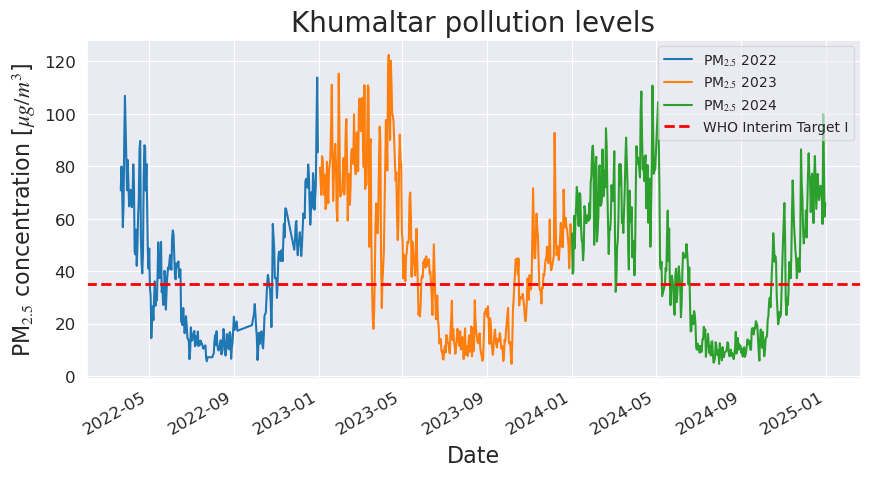

In [18]:
# plot the pollution levels
fig, ax = plt.subplots(figsize=(10,5))
# [df.plot(y='PM2.5',x='date',ax=ax,label=fr'PM$_{{2.5}}$ {y}') for df,y in zip(dataframes,years)]
for df in dataframes:
    year = df['date'].dt.year.iloc[0]
    df.plot(y='PM2.5', x='date', ax=ax, label=fr'PM$_{{2.5}}$ {year}')

# add in the WHO Interim Target I line
ax.axhline(35,lw=2.0,color='r', linestyle='--',label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels')
ax.set_ylabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]')
ax.set_xlabel('Date')
ax.legend()
plt.show()

PM$_{2.5}$ concentration reaches dangerous levels often throughout the year. This is detrimental to our physical and mental well-being.

In [19]:
# check of the iteration over months, years and dataframes correctly
for month in range(1, 13):
    for df, year in zip(dataframes, years):
        month_data = df[df['date'].dt.month == month].copy()
        print(month_data)

Empty DataFrame
Columns: [date, PM2.5, PM10, month, month_name, year]
Index: []
         date       PM2.5        PM10  month month_name  year
2  2023-01-03   79.391560  122.638365      1    January  2023
3  2023-01-04   72.903476  118.191242      1    January  2023
4  2023-01-05   69.048247  115.037608      1    January  2023
5  2023-01-06   83.780244  157.171654      1    January  2023
6  2023-01-07   82.265515  161.350902      1    January  2023
7  2023-01-08   73.032792  151.337156      1    January  2023
8  2023-01-09   69.071037  147.913315      1    January  2023
9  2023-01-10   76.763589  135.870678      1    January  2023
10 2023-01-11   63.619447  124.352416      1    January  2023
11 2023-01-12   65.358175  110.703323      1    January  2023
12 2023-01-13   81.682836  134.758265      1    January  2023
13 2023-01-14   71.034739  142.834406      1    January  2023
14 2023-01-15   65.888473  106.414390      1    January  2023
15 2023-01-16   78.474559  126.470768      1    Janu

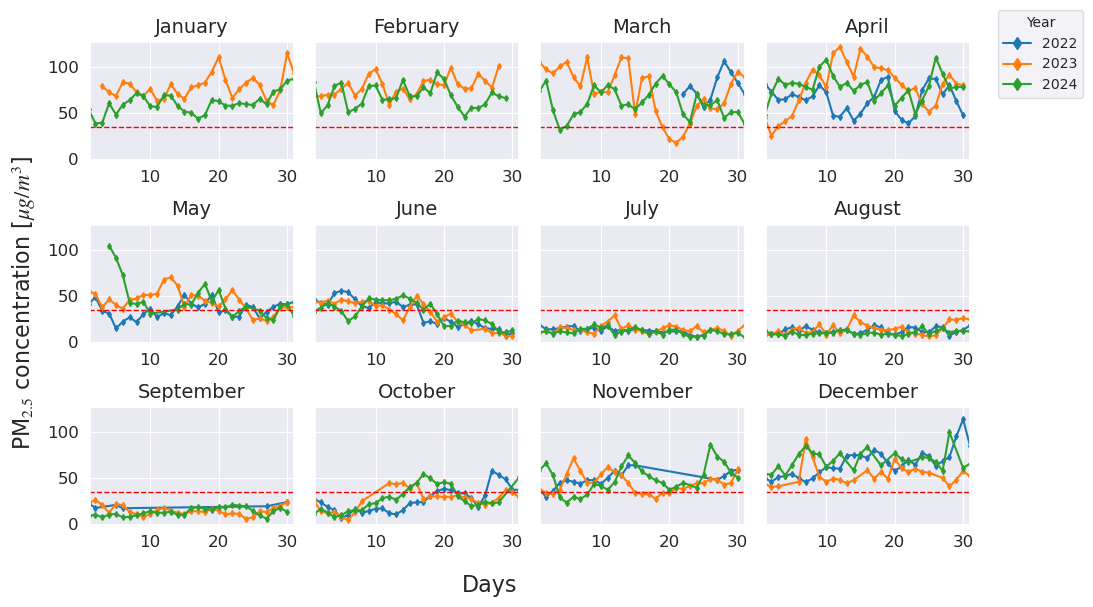

In [20]:
# let's look at how the PM2.5 levels fluctuated every month in Khumaltar
fig_monthly_plt, axes = plt.subplots(3, 4, sharey=True, figsize=(10, 6))
axes = axes.flatten()

for month in range(1, 13):
    for df, year in zip(dataframes, years):
        # select the months and plot them
        month_data = df[df['date'].dt.month == month].copy()
        
        # Extract day of month for x-axis
        month_data['day'] = month_data['date'].dt.day
        
        # Plot using day instead of full date, (month-1) since indexing starts at 0, not 1
        axes[month-1].plot(month_data['day'], month_data['PM2.5'], label=year, marker='d', markersize=3)
    
    axes[month-1].set_title(calendar.month_name[month], fontsize=14)
    axes[month-1].axhline(y=35, color='r', linestyle='--', linewidth=1)
    axes[month-1].set_xlabel('')
    axes[month-1].set_xlim(1, 31)  # Set x-axis to day range

fig_monthly_plt.supylabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]', fontsize=16)
fig_monthly_plt.supxlabel('Days', fontsize=16)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig_monthly_plt.legend(handles, labels, loc='upper right', title='Year', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

Pollution levels follow a seasonal pattern.

In [21]:
combined_df = pd.concat([df for df in dataframes])
combined_df

,date,PM2.5,PM10,month,month_name,year
7,2022-03-22,70.764399,183.014240,3,March,2022
8,2022-03-23,79.836837,207.656542,3,March,2022
9,2022-03-24,71.542840,170.480046,3,March,2022
10,2022-03-25,56.742322,164.989258,3,March,2022
11,2022-03-26,65.004515,227.428175,3,March,2022
...,...,...,...,...,...,...
360,2024-12-26,67.356769,119.901177,12,December,2024
361,2024-12-27,57.955956,103.029187,12,December,2024
362,2024-12-28,99.847756,161.396195,12,December,2024
364,2024-12-30,60.751778,98.946377,12,December,2024


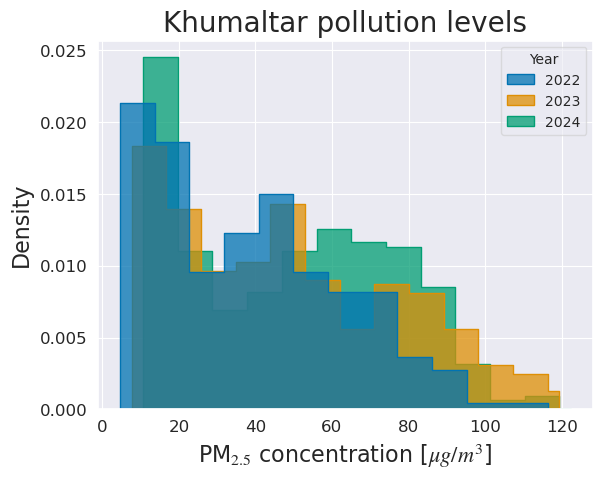

In [22]:
# histogram comparison
fig_hist, ax = plt.subplots()

sns.histplot(data=combined_df, x='PM2.5', hue='year', stat='density', element='step', multiple='dodge', common_norm=False,  palette='colorblind', ax=ax, legend=True)
legend = ax.get_legend()
legend.set_title('Year')

# list comprehension
# [sns.histplot(data=df['PM2.5'], stat='density', kde=True, label=fr'PM$_{{2.5}}$ {y}', ax=ax) for df,y in zip(dataframes,years)]

ax.set_title(f'{station_loc} pollution levels')
ax.set_xlabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]')
plt.show()

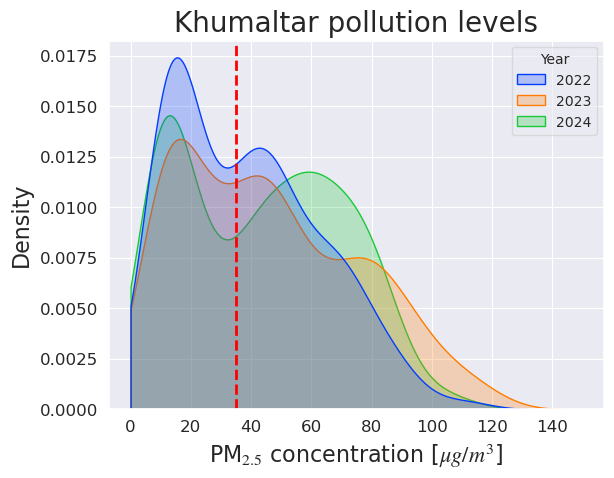

In [23]:
# smooth histogram
fig_kde, ax = plt.subplots()

sns.kdeplot(data=combined_df, x='PM2.5', hue='year', fill=True, clip=(0, None), ax=ax, common_norm=False, palette='bright', legend=True)
legend = ax.get_legend()
legend.set_title('Year')

# could plot with this list comprehension line as well
# [sns.kdeplot(data=df['PM2.5'],clip=(0, None),fill=True,ax=ax,label=fr'PM$_{{2.5}}$ {y}') for df,y in zip(dataframes,years)]

ax.axvline(35,lw=2.0,color='r', linestyle='--',label='WHO Interim Target I')
ax.set_title(f'{station_loc} pollution levels')
ax.set_xlabel(r'PM$_{2.5}$ concentration [$\mu g / m^3$]')
plt.show()

In [24]:
monthly_stats = []
for df, year in zip(dataframes, years):
    stats = df.groupby('month')['PM2.5'].agg(['mean', 'max', 'min', 'std'])
    stats['year'] = year
    monthly_stats.append(stats)

In [25]:
monthly_stats

[            mean         max        min        std  year
 month                                                   
 3      78.840317  106.785903  56.742322  14.976586  2022
 4      65.079130   89.605176  39.122431  15.180899  2022
 5      34.520894   51.116013  14.452331   8.692586  2022
 6      31.545420   55.507292   6.417772  14.411653  2022
 7      12.557889   18.532033   5.632493   3.122841  2022
 8      12.082870   17.919984   6.569223   3.418842  2022
 9      20.247806   23.882044  17.241700   2.688924  2022
 10     26.028333   57.978042   6.095956  13.068853  2022
 11     48.996168   63.908758  29.752348   9.109985  2022
 12     66.508628  113.766135  45.739315  15.003513  2022,
             mean         max        min        std  year
 month                                                   
 1      79.039922  115.250229  59.042239  13.100961  2023
 2      79.668490  101.256409  59.263748  10.536067  2023
 3      73.997378  110.886518  17.959981  27.595385  2023
 4      80.10

In [26]:
# monthly stats by years
all_monthly_stats = pd.concat([m for m in monthly_stats])

In [27]:
all_monthly_stats

,mean,max,min,std,year
month,,,,,
3,78.840317,106.785903,56.742322,14.976586,2022
4,65.079130,89.605176,39.122431,15.180899,2022
5,34.520894,51.116013,14.452331,8.692586,2022
6,31.545420,55.507292,6.417772,14.411653,2022
7,12.557889,18.532033,5.632493,3.122841,2022
8,12.082870,17.919984,6.569223,3.418842,2022
9,20.247806,23.882044,17.241700,2.688924,2022
10,26.028333,57.978042,6.095956,13.068853,2022
11,48.996168,63.908758,29.752348,9.109985,2022


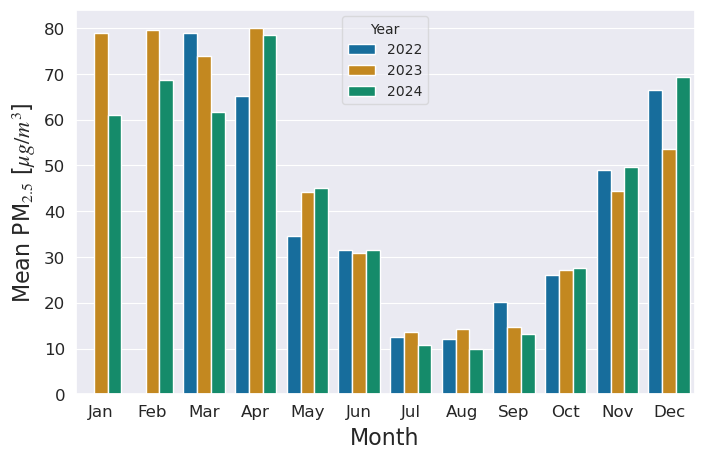

In [28]:
# get the monthly means
fig_monthly_means, ax = plt.subplots(figsize=(8,5))

sns.barplot(x='month', y='mean', data=all_monthly_stats, ax=ax, hue='year',palette='colorblind')
ax.set_ylabel(r'Mean PM$_{2.5}$ [$\mu g / m^3$]')
ax.set_xlabel('Month')

# work with current axis
ax = plt.gca()
# Get current tick positions where we will put the abbreviated months as labels
tick_positions = ax.get_xticks()
# Create month labels for the actual months in the data.
labels = [calendar.month_abbr[i] for i in range(1, 13)]
# Set ticks first, then labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels)
ax.legend(title='Year')
plt.show()

When plots have only certain colors - reds, greens, yellows, oranges - I struggle with it. I prefer these color palettes that are hopefully distinct for everyone.

### Monthly distributions

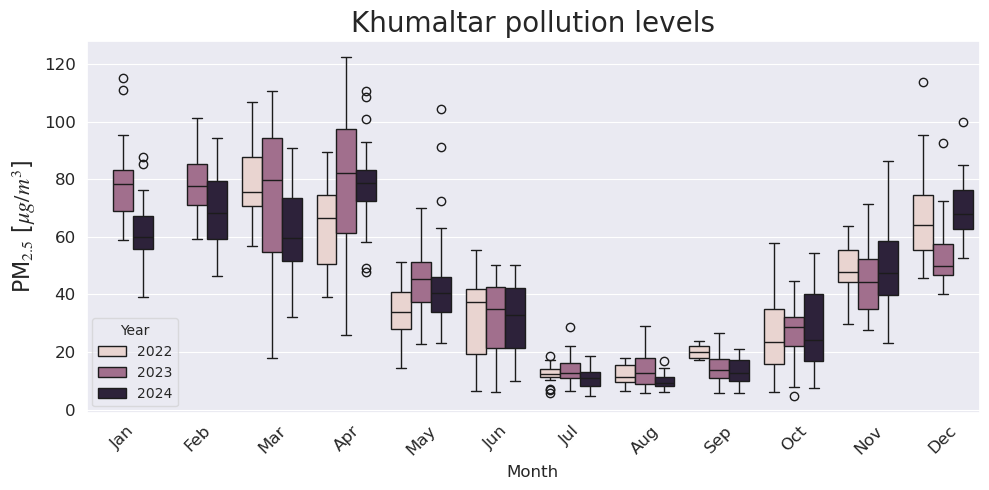

In [29]:
# Create boxplot
fig_bxplt, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=combined_df, x='month', y='PM2.5', hue='year', ax=ax)

ax.set_title(f'{station_loc} pollution levels')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel(r'PM$_{2.5}$ [$\mu g / m^3$]')
ax.legend(title='Year')
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I really like these boxplots above. They convey the information well.

This plot below using `FacetGrid` may not be the best use of the tool, but provides an example of another way to compare this dataset.

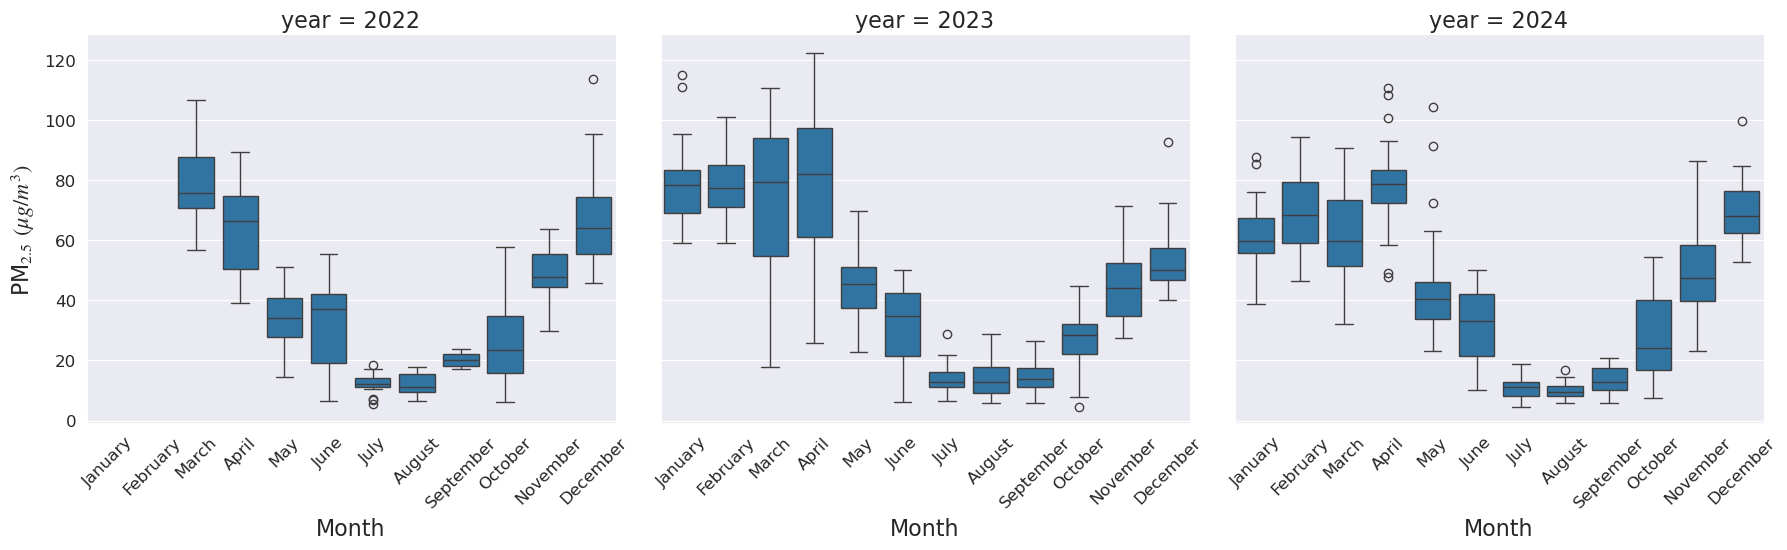

In [30]:
# set the month order. Not having Jan, Feb data for 2022 messed up the plot a bit
month_order = list(calendar.month_name)[1:]

combined_df['year'] = combined_df['year'].astype(str)  # Convert to categorical
g = sns.FacetGrid(combined_df, col='year', height=5, aspect=1.2, sharey=True)
g.map(sns.boxplot, 'month_name', 'PM2.5', order=month_order)
g.set_axis_labels('Month', r'PM$_{2.5}$ $(\mu g / m^3)$')
g.set_xticklabels(rotation=45)
plt.show()

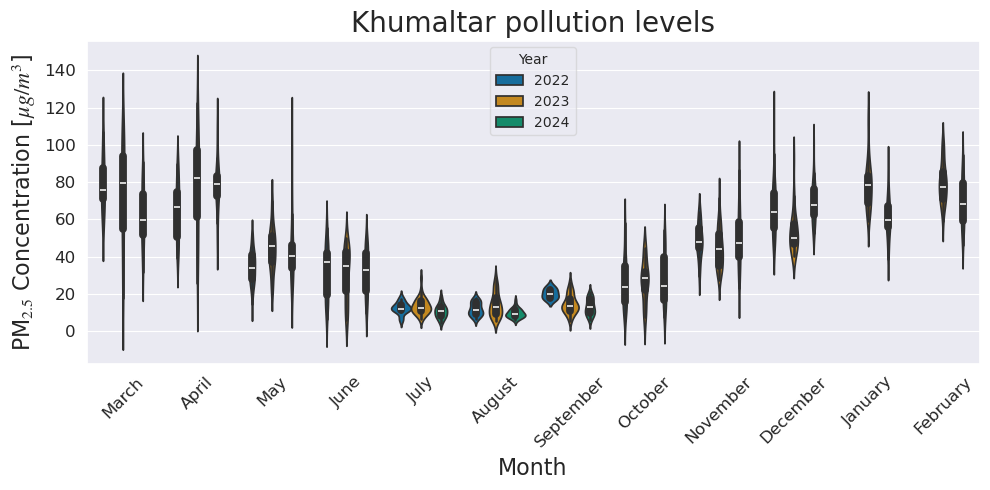

In [31]:
fig, ax=plt.subplots(figsize=(10, 5))
sns.violinplot(x='month_name', y='PM2.5', hue='year', data=combined_df, ax=ax, palette='colorblind')
ax.set_title(f'{station_loc} pollution levels')
ax.set_xlabel('Month')
ax.set_ylabel(r'PM$_{2.5}$ Concentration [$\mu g / m^3$]')
ax.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Above, we see many ways to compare the PM$_{2.5}$ concentrations over several months and years.

What would be really cool is to overlay this on the map of Nepal. Perhaps that will be my next task...